Linera Regression Assumptions
-------

1 . linearity

2.Mean of Residuals

3.Check for homoscedasticity

4.Checks for Normality of errors terms / residuals

5.No Autocorrelation of residuals

6.No perfect Multicollinearity

7.Other Models of for Comparison



In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sea

In [60]:
dataset = pd.read_csv("/home/ubuntu-wasim/Downloads/Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [62]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


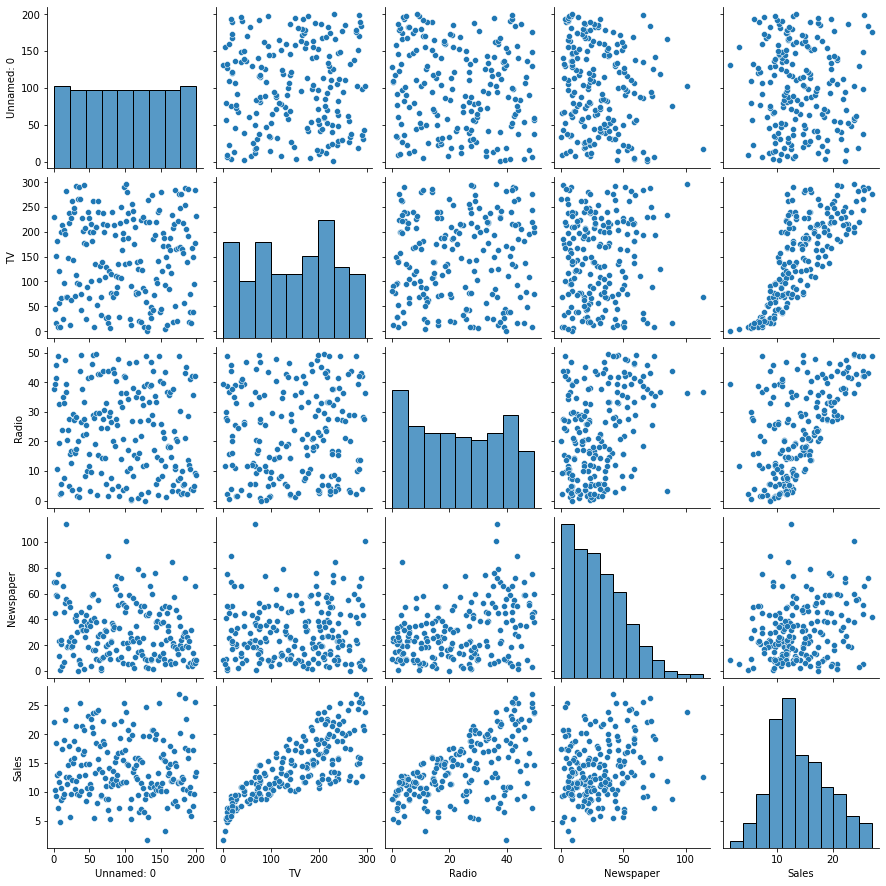

In [63]:
p = sea.pairplot(dataset)
p

1.Linearity
--------------


In [64]:
dataset.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Figure size 720x576 with 0 Axes>

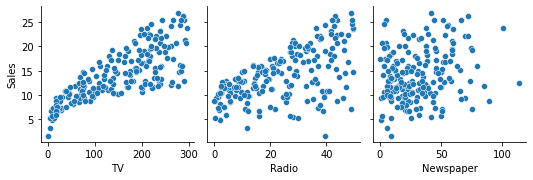

In [65]:
plt.figure(figsize=(10,8))
p = sea.pairplot(dataset , x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

A tip is to remember to always see the plots from where the dependent variable is on the y axis. Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable as y and independents as x(s).

_____________________
fitting the linear Model


In [66]:
x = dataset.drop(['Sales'] , axis=1)
y = dataset.Sales

In [67]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X = std.fit_transform(x)


In [78]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.25 , random_state=0)

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(X_train , y_train)


LinearRegression()

In [80]:
y_pred = regression.predict(X_test)

confusion matrix

It's because accuracy_score is for classification tasks only. For regression you should use something different, for example:

ValueError: continuous is not supported

The confusion matrix is used to tell you how many predictions were classified correctly or incorrectly. You are looking at a regression model, which gives you a continous output (not classification).

So when you run confusion_matrix(y_test, y_pred) it will throw the ValueError because it expected class predictions, not floating point numbers.

Are you trying to predict classes, or really just a number output? If not, then you should not be using the confusion matrix.

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_test, y_pred)

regression.score(X_test,y_test)

0.8543593889076032

In [83]:
print("R squared : {} ".format(r2_score(y_true=y_test , y_pred=y_pred)))

R squared : 0.8543593889076032 


In [85]:
np.mean((y_test - y_pred)**2)

4.104954026507194

In [84]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

4.104954026507194

2.Mean of Residuals
-------------
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. 

In [88]:
residuals = y_test.values - y_pred

mean_residuals = np.mean(residuals)

print("Mean of Residuals {} ".format(mean_residuals))

Mean of Residuals -0.11564387456639265 


Very Close to zero so all good here

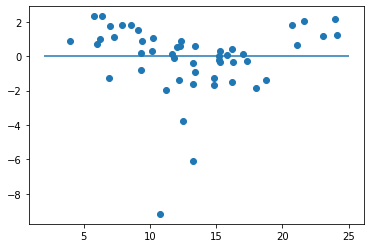

In [95]:
residuals = pd.Series(residuals)
#print(residuals)
plt.scatter(y_pred, residuals)
plt.hlines(0,2 , 25)

3.Check for homoscedasticity
-----------------

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Detecting heteroscedasticity!

Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


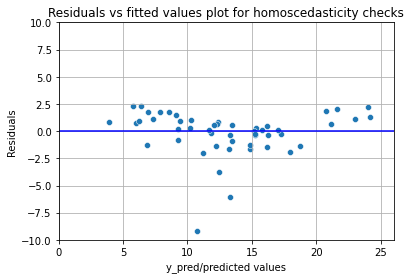

In [98]:
p = sea.scatterplot(y_pred , residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.grid()
plt.ylim(-10,10)
plt.xlim(0,26)

p=sea.lineplot([0,26],[0,0] , color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity checks')


Now we will be applying tests.
A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [99]:
import statsmodels.stats.api as sms

ModuleNotFoundError: No module named 'statsmodels'

4.check for Normality of error terms/residuals
------------------

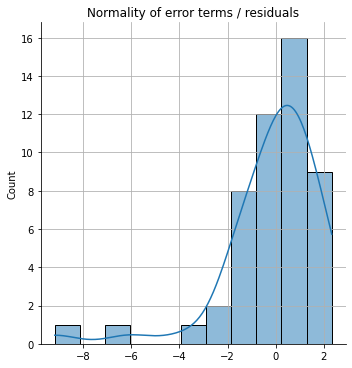

In [106]:
sea.displot(residuals , kde=True)
plt.title('Normality of error terms / residuals')
plt.grid()


The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

5.No autocorrelation of residuals
-------------------------------
When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. 

There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

There should not be autocorrelation in the data so the error terms should not form any pattern.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


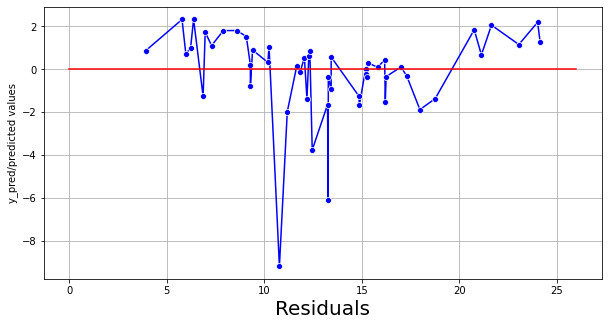

In [115]:
plt.figure(figsize=(10,5))
sea.lineplot(y_pred , residuals , marker='o', color='blue')
sea.lineplot([0,26],[0,0],color='red')
plt.xlabel('Residuals', fontsize=20)
plt.ylabel('y_pred/predicted values')
plt.grid()

6.no perfect multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

<AxesSubplot:>

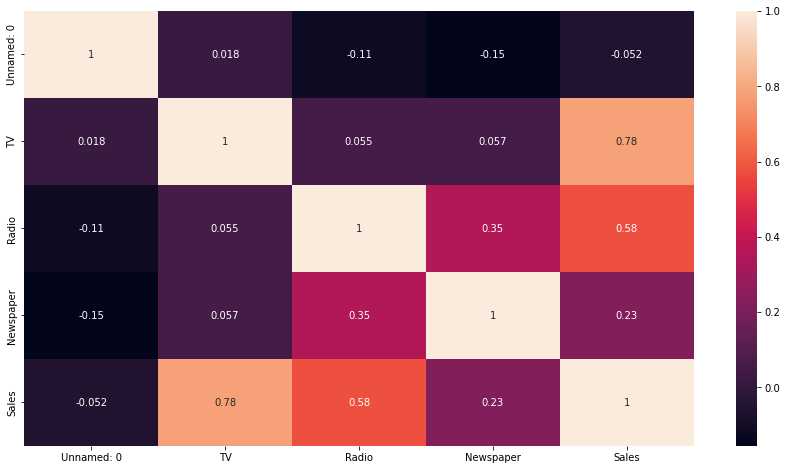

In [123]:
plt.figure(figsize=(15,8))
sea.heatmap(dataset.corr() , annot = True )

Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables. In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model.